# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('sinasc_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [14]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [10]:
medias_idades = sinasc_raw.groupby('munResNome').agg({'IDADEMAE': 'mean', 'IDADEPAI': 'mean'})

# Exiba o DataFrame resultante
print(medias_idades)

                            IDADEMAE   IDADEPAI
munResNome                                     
Alta Floresta D'Oeste      25.991826  29.548701
Alto Alegre dos Parecis    24.844156  29.179104
Alto Paraíso               24.960177  28.833333
Alvorada D'Oeste           25.770732  30.757282
Ariquemes                  25.607866  32.466667
Buritis                    25.559177  30.812500
Cabixi                     26.037500  34.333333
Cacaulândia                25.546667  36.333333
Cacoal                     26.890102  30.931854
Campo Novo de Rondônia     24.825301  30.500000
Candeias do Jamari         25.243323  29.894737
Castanheiras               27.281250  30.392857
Cerejeiras                 27.240506  31.652778
Chupinguaia                25.333333  29.629630
Colorado do Oeste          27.602804  34.354839
Corumbiara                 24.716535  32.470588
Costa Marques              24.412017  30.613636
Cujubim                    24.482927  31.400000
Espigão D'Oeste            26.093333  31

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [16]:
# Ajustando o formato da data (7 de junho)
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%Y/%m/%d')

# Filtrar o conjunto de dados para a data de nascimento específica (7 de junho)
aniversario_df = sinasc_raw[sinasc_raw['DTNASC'].dt.day == 7 & (sinasc_raw['DTNASC'].dt.month == 6)]

# Calcular o peso médio por sexo e faixa de escolaridade da mãe
peso_medio_por_sexo_escolaridade = aniversario_df.groupby(['SEXO', 'ESCMAE']).agg({'PESO': 'mean'}).reset_index()

# Exibir o resultado
print(peso_medio_por_sexo_escolaridade)

        SEXO           ESCMAE         PESO
0   Feminino       1 a 3 anos  3135.000000
1   Feminino  12 anos ou mais  2895.714286
2   Feminino       4 a 7 anos  3085.000000
3   Feminino      8 a 11 anos  3051.619048
4  Masculino       1 a 3 anos  2830.000000
5  Masculino  12 anos ou mais  3346.250000
6  Masculino       4 a 7 anos  3646.000000
7  Masculino      8 a 11 anos  3423.958333


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [21]:
# Supondo que 'DTNASC' é a coluna que contém a data de nascimento
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%Y/%m/%d')

# Filtrar o conjunto de dados para o ano de 2019
nascimentos_2019 = sinasc_raw[sinasc_raw['DTNASC'].dt.year == 2019]

# Identificar o município com o menor número de nascimentos
menos_nascimentos = nascimentos_2019['munResNome'].value_counts().idxmin()

menos_nascimentos

'Município ignorado - RO'

In [24]:
# Contar o número de nascimentos em cada município
contagem_nascimentos = nascimentos_2019['munResNome'].value_counts()

# Identificar o segundo menor número de nascimentos
segundo_menor = contagem_nascimentos.nlargest(2).iloc[-1]

# Identificar o município correspondente ao segundo menor número de nascimentos
segundo_menor_municipio = contagem_nascimentos[contagem_nascimentos == segundo_menor].index[0]

segundo_menor_municipio

'Ji-Paraná'

In [25]:
# Filtrar o conjunto de dados para Ji-Paraná
ji_parana_df = sinasc_raw[sinasc_raw['munResNome'] == 'Ji-Paraná']

# Calcular a idade média, máxima e mínima das mães em Ji-Paraná
idade_media = ji_parana_df['IDADEMAE'].mean()
idade_maxima = ji_parana_df['IDADEMAE'].max()
idade_minima = ji_parana_df['IDADEMAE'].min()

# Exibir os resultados
print(f"Idade média das mães em Ji-Paraná: {idade_media:.2f} anos")
print(f"Idade máxima das mães em Ji-Paraná: {idade_maxima} anos")
print(f"Idade mínima das mães em Ji-Paraná: {idade_minima} anos")

Idade média das mães em Ji-Paraná: 26.36 anos
Idade máxima das mães em Ji-Paraná: 44 anos
Idade mínima das mães em Ji-Paraná: 12 anos


In [26]:
# Filtrar o conjunto de dados para Ji-Paraná
ji_parana_df = sinasc_raw[sinasc_raw['munResNome'] == 'Ji-Paraná']

# Calcular a idade média, máxima e mínima dos pais em Ji-Paraná
idade_media = ji_parana_df['IDADEPAI'].mean()
idade_maxima = ji_parana_df['IDADEPAI'].max()
idade_minima = ji_parana_df['IDADEPAI'].min()

# Exibir os resultados
print(f"Idade média dos pais em Ji-Paraná: {idade_media:.2f} anos")
print(f"Idade máxima dos pais em Ji-Paraná: {idade_maxima} anos")
print(f"Idade mínima dos pais em Ji-Paraná: {idade_minima} anos")

Idade média dos pais em Ji-Paraná: 31.13 anos
Idade máxima dos pais em Ji-Paraná: 63.0 anos
Idade mínima dos pais em Ji-Paraná: 15.0 anos


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [27]:
nascimentos_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

# Identificar o município com o maior número de nascimentos em março
mais_nascimentos_marco = nascimentos_marco['munResNome'].value_counts().idxmax()

# Exibir o resultado
print(f"O município com o maior número de nascimentos em março foi: {mais_nascimentos_marco}")

O município com o maior número de nascimentos em março foi: Porto Velho


In [29]:
# Filtrar o conjunto de dados para incluir apenas as entradas de Porto Velho
porto_velho_df = sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho']

# Calcular a quantidade média, máxima e mínima de filhos vivos em Porto Velho
filhos_vivos_media = porto_velho_df['QTDFILVIVO'].mean()
filhos_vivos_maximo = porto_velho_df['QTDFILVIVO'].max()
filhos_vivos_minimo = porto_velho_df['QTDFILVIVO'].min()

# Exibir os resultados
print(f"Quantidade média de filhos vivos em Porto Velho: {filhos_vivos_media:.2f}")
print(f"Quantidade máxima de filhos vivos em Porto Velho: {filhos_vivos_maximo}")
print(f"Quantidade mínima de filhos vivos em Porto Velho: {filhos_vivos_minimo}")

Quantidade média de filhos vivos em Porto Velho: 1.17
Quantidade máxima de filhos vivos em Porto Velho: 12.0
Quantidade mínima de filhos vivos em Porto Velho: 0.0


In [30]:
# Calcular a idade média, máxima e mínima dos pais em Porto Velho
idade_pais_media = porto_velho_df['IDADEPAI'].mean()
idade_pais_maximo = porto_velho_df['IDADEPAI'].max()
idade_pais_minimo = porto_velho_df['IDADEPAI'].min()

# Exibir os resultados
print(f"Idade média do pais em Porto Velho: {idade_pais_media:.2f}")
print(f"Idade máxima do pais em Porto Velho: {idade_pais_maximo}")
print(f"Idade mínima do pais em Porto Velho: {idade_pais_minimo}")

Idade média do pais em Porto Velho: 32.35
Idade máxima do pais em Porto Velho: 65.0
Idade mínima do pais em Porto Velho: 16.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Insight:
- Ao fazer um gráfico de dispersão entre a idade da mãe e o peso do bebê, é só isso ver a baixa correlação entre elas, ou seja, uma variável não consegue explicar a outra.

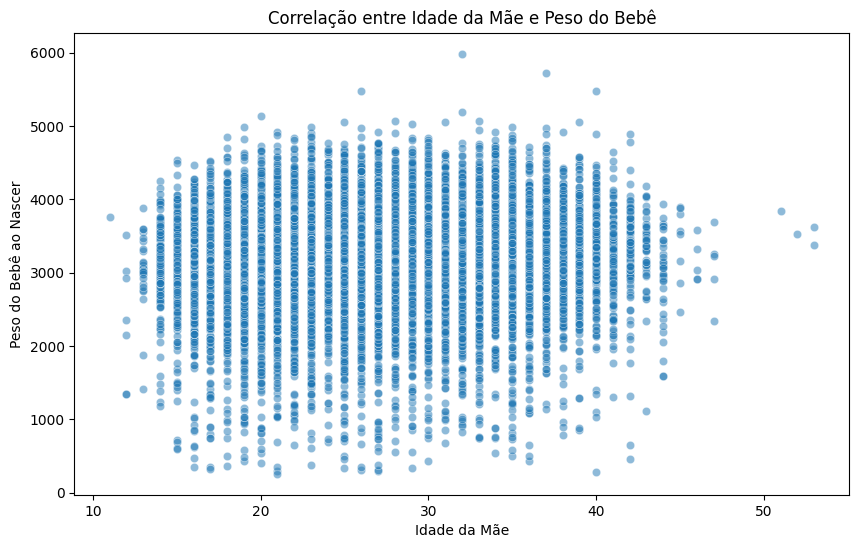

In [31]:
# Scatter plot entre Idade da Mãe e Peso do Bebê
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDADEMAE', y='PESO', data=sinasc_raw, alpha=0.5)
plt.title('Correlação entre Idade da Mãe e Peso do Bebê')
plt.xlabel('Idade da Mãe')
plt.ylabel('Peso do Bebê ao Nascer')
plt.show()